In [4]:
    from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import Libraries

from os import getcwd
from os.path import isfile
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pylab

import plotly.offline as pyoff
import plotly.graph_objs as go


#inititate Plotly
pyoff.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
%pwd

'/content'

In [7]:
%cd '/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/'

/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('chargingstations_edits.csv')

# Convert the 'Start Date' column to datetime type
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract the year from the 'Start Date' column
df['Year'] = df['Start Date'].dt.year

# Group by year and sum the 'Energy Consumed' column
yearly_consumption = df.groupby('Year')['Energy Consumed'].sum()

# Print the result
print(yearly_consumption)

<ipython-input-5-7e318a2916e3>:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Year
2011      8368.059866
2012     42974.118844
2013     71901.404245
2014     88389.093900
2015    181465.351055
2016    405569.119610
2017    422255.286000
2018    360270.736000
2019    437696.059000
2020    197624.376000
Name: Energy Consumed, dtype: float64


In [ ]:
import pandas as pd

# Read the CSV files
energy_consumption_df = pd.read_csv('chargingstations_edits.csv')
ev_sales_increase_rate_df = pd.read_csv('ev_sales_increase_rate.csv')
ev_adoption_rate_df = pd.read_csv('ev_adoption_rate.csv')

# Convert the 'Start Date' column to datetime type
energy_consumption_df['Start Date'] = pd.to_datetime(energy_consumption_df['Start Date'])

# Extract the year from the 'Start Date' column
energy_consumption_df['Year'] = energy_consumption_df['Start Date'].dt.year

# Group by year and sum the 'Energy Consumed' column
yearly_consumption_df = energy_consumption_df.groupby('Year')['Energy Consumed'].sum().reset_index()

# Merge the yearly energy consumption data with EV sales increase rate
merged_df = pd.merge(yearly_consumption_df, ev_sales_increase_rate_df, on='Year', how='left')

# Merge the result with EV adoption rate
merged_df = pd.merge(merged_df, ev_adoption_rate_df, on='Year', how='left')

# Print the merged DataFrame
print(merged_df)

<ipython-input-7-df2fc69fe46c>:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



   Year  Energy Consumed  Number of Vehicles_x  Number of Vehicles_y
0  2011      8368.059866            441.176471            400.000000
1  2012     42974.118844             -9.782609             73.333333
2  2013     71901.404245            360.240964            226.282051
3  2014     88389.093900             -6.544503             60.707269
4  2015    181465.351055             29.691877             43.154034
5  2016    405569.119610              3.455724             30.999146
6  2017    422255.286000             13.152401             27.574967
7  2018    360270.736000            103.136531             42.514052
8  2019    437696.059000            -25.068120             18.178559
9  2020    197624.376000            -11.030303              9.405340


In [ ]:
#Arima Model for Energy Prediction from Charging Points Dataset
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Read the CSV files
energy_consumption_df = pd.read_csv('chargingstations_edits.csv')
ev_sales_increase_rate_df = pd.read_csv('ev_sales_increase_rate.csv')
ev_adoption_rate_df = pd.read_csv('ev_adoption_rate.csv')

# Convert the 'Start Date' column to datetime type
energy_consumption_df['Start Date'] = pd.to_datetime(energy_consumption_df['Start Date'])

# Extract the year from the 'Start Date' column
energy_consumption_df['Year'] = energy_consumption_df['Start Date'].dt.year

# Group by year and sum the 'Energy Consumed' column
yearly_consumption_df = energy_consumption_df.groupby('Year')['Energy Consumed'].sum().reset_index()

# Split the data into training and testing sets
train_data = yearly_consumption_df[yearly_consumption_df['Year'] < 2019]
test_data = yearly_consumption_df[yearly_consumption_df['Year'] >= 2019]

# ARIMA Model
arima_model = ARIMA(train_data['Energy Consumed'], order=(1, 1, 1))
arima_results = arima_model.fit()

# Make predictions on the test set
arima_predictions = arima_results.forecast(steps=len(test_data))

# Evaluate ARIMA model performance
arima_mse = mean_squared_error(test_data['Energy Consumed'], arima_predictions)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data['Energy Consumed'], arima_predictions)

print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", arima_mse)
print("Root Mean Squared Error (RMSE):", arima_rmse)
print("Mean Absolute Error (MAE):", arima_mae)

# Forecast for the next 4 years using ARIMA
arima_future_forecast = arima_results.forecast(steps=4)

print("\nARIMA Forecast for the next 4 years:")
print(arima_future_forecast)


ARIMA Model Evaluation:
Mean Squared Error (MSE): 15784250233.51308
Root Mean Squared Error (RMSE): 125635.3860722093
Mean Absolute Error (MAE): 120010.55084788668

ARIMA Forecast for the next 4 years:
8     354856.974611
9     354806.393307
10    354805.920721
11    354805.916305
Name: predicted_mean, dtype: float64


In [ ]:
#Arima Model for Energy Prediction from Charging Points Dataset + EV Adoption Rate + EV Sales Increase Rate
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Read the CSV files
energy_consumption_df = pd.read_csv('chargingstations_edits.csv')
ev_sales_increase_rate_df = pd.read_csv('ev_sales_increase_rate.csv')
ev_adoption_rate_df = pd.read_csv('ev_adoption_rate.csv')

# Convert the 'Start Date' column to datetime type
energy_consumption_df['Start Date'] = pd.to_datetime(energy_consumption_df['Start Date'])

# Extract the year from the 'Start Date' column
energy_consumption_df['Year'] = energy_consumption_df['Start Date'].dt.year

# Group by year and sum the 'Energy Consumed' column
yearly_consumption_df = energy_consumption_df.groupby('Year')['Energy Consumed'].sum().reset_index()

# Merge the yearly energy consumption data with EV sales increase rate and EV adoption rate
merged_df = pd.merge(yearly_consumption_df, ev_sales_increase_rate_df, on='Year', how='left')
merged_df = pd.merge(merged_df, ev_adoption_rate_df, on='Year', how='left')
merged_df = merged_df.fillna(0)  # Fill missing values with 0

# Rename columns for clarity
merged_df = merged_df.rename(columns={'Number of Vehicles_x': 'EV_Sales_Increase_Rate', 'Number of Vehicles_y': 'EV_Adoption_Rate'})
print (merged_df)

# Split the data into training and testing sets
train_data = merged_df[merged_df['Year'] < 2019]
test_data = merged_df[merged_df['Year'] >= 2019]

# ARIMA Model
arima_model = ARIMA(train_data['Energy Consumed'], order=(1, 1, 1), exog=train_data[['EV_Sales_Increase_Rate', 'EV_Adoption_Rate']])
arima_results = arima_model.fit()

# Make predictions on the test set
arima_predictions = arima_results.forecast(steps=len(test_data), exog=test_data[['EV_Sales_Increase_Rate', 'EV_Adoption_Rate']])

# Evaluate ARIMA model performance
arima_mse = mean_squared_error(test_data['Energy Consumed'], arima_predictions)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data['Energy Consumed'], arima_predictions)

print("ARIMA Model Evaluation:")
print("Mean Squared Error (MSE):", arima_mse)
print("Root Mean Squared Error (RMSE):", arima_rmse)
print("Mean Absolute Error (MAE):", arima_mae)

# Forecast for the next 5 years using ARIMA
arima_future_exog = pd.DataFrame({'EV_Sales_Increase_Rate': [0] * 4, 'EV_Adoption_Rate': [0] * 4})
arima_future_forecast = arima_results.forecast(steps=4, exog=arima_future_exog)

print("\nARIMA Forecast for the next 4 years:")
print(arima_future_forecast)



   Year  Energy Consumed  EV_Sales_Increase_Rate  EV_Adoption_Rate
0  2011      8368.059866              441.176471        400.000000
1  2012     42974.118844               -9.782609         73.333333
2  2013     71901.404245              360.240964        226.282051
3  2014     88389.093900               -6.544503         60.707269
4  2015    181465.351055               29.691877         43.154034
5  2016    405569.119610                3.455724         30.999146
6  2017    422255.286000               13.152401         27.574967
7  2018    360270.736000              103.136531         42.514052
8  2019    437696.059000              -25.068120         18.178559
9  2020    197624.376000              -11.030303          9.405340
ARIMA Model Evaluation:
Mean Squared Error (MSE): 17245225133.00835
Root Mean Squared Error (RMSE): 131321.07649957927
Mean Absolute Error (MAE): 118709.54265368011

ARIMA Forecast for the next 4 years:
8     370513.370866
9     370287.492169
10    370297.867851


In [ ]:
#Energy Demand Forecast Prediction using Prophet
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Read the CSV files
energy_consumption_df = pd.read_csv('chargingstations_edits.csv')
ev_sales_increase_rate_df = pd.read_csv('ev_sales_increase_rate.csv')
ev_adoption_rate_df = pd.read_csv('ev_adoption_rate.csv')

# Convert the 'Start Date' column to datetime type
energy_consumption_df['Start Date'] = pd.to_datetime(energy_consumption_df['Start Date'])

# Extract the year from the 'Start Date' column
energy_consumption_df['Year'] = energy_consumption_df['Start Date'].dt.year

# Group by year and sum the 'Energy Consumed' column
yearly_consumption_df = energy_consumption_df.groupby('Year')['Energy Consumed'].sum().reset_index()

# Merge the yearly energy consumption data with EV sales increase rate and EV adoption rate
merged_df = pd.merge(yearly_consumption_df, ev_sales_increase_rate_df, on='Year', how='left')
merged_df = pd.merge(merged_df, ev_adoption_rate_df, on='Year', how='left')
merged_df = merged_df.fillna(0)  # Fill missing values with 0

# Rename columns for clarity
merged_df = merged_df.rename(columns={'Number of Vehicles_x': 'EV_Sales_Increase_Rate', 'Number of Vehicles_y': 'EV_Adoption_Rate'})
#print (merged_df)

# Split the data into training and testing sets
train_data = merged_df[merged_df['Year'] < 2019]
# Convert 'Year' to datetime format
train_data['Year'] = pd.to_datetime(train_data['Year'], format='%Y')
test_data = merged_df[merged_df['Year'] >= 2019]
test_data['Year'] = pd.to_datetime(test_data['Year'], format='%Y')

# Prophet Model
prophet_df = train_data.rename(columns={'Year': 'ds', 'Energy Consumed': 'y'})
print(prophet_df)
prophet_model = Prophet()
prophet_model.add_regressor('EV_Sales_Increase_Rate')
prophet_model.add_regressor('EV_Adoption_Rate')
prophet_model.fit(prophet_df)
'''
# Make predictions on the test set
prophet_future = prophet_model.make_future_dataframe(periods=4, freq='Y')
print(prophet_future)
prophet_future['EV_Sales_Increase_Rate'] = test_data['EV_Sales_Increase_Rate'].iloc[:4].values
prophet_future['EV_Adoption_Rate'] = test_data['EV_Adoption_Rate'].iloc[:4].values
prophet_forecast = prophet_model.predict(prophet_future)
'''
# Make predictions on the test set
prophet_future = prophet_model.make_future_dataframe(periods=4, freq='Y')

# Get the number of available rows in test_data
num_test_rows = len(test_data)

# Create a new dataframe with the required columns
extra_data = pd.DataFrame({
    'ds': prophet_future['ds'][-4:],
    'EV_Sales_Increase_Rate': test_data['EV_Sales_Increase_Rate'].iloc[-num_test_rows:].reindex(range(4), fill_value=0).values,
    'EV_Adoption_Rate': test_data['EV_Adoption_Rate'].iloc[-num_test_rows:].reindex(range(4), fill_value=0).values
})

# Merge the necessary columns from prophet_df with prophet_future
prophet_future = prophet_future.merge(prophet_df[['ds', 'EV_Sales_Increase_Rate', 'EV_Adoption_Rate']], on='ds', how='left')

# Update the 'EV_Sales_Increase_Rate' and 'EV_Adoption_Rate' columns in prophet_future with values from extra_data
prophet_future.loc[prophet_future['ds'].isin(extra_data['ds']), 'EV_Sales_Increase_Rate'] = extra_data['EV_Sales_Increase_Rate']
prophet_future.loc[prophet_future['ds'].isin(extra_data['ds']), 'EV_Adoption_Rate'] = extra_data['EV_Adoption_Rate']

print(prophet_future)
prophet_forecast = prophet_model.predict(prophet_future)

# Evaluate Prophet model performance
prophet_mse = mean_squared_error(test_data['Energy Consumed'], prophet_forecast.iloc[-len(test_data):]['yhat'])
prophet_rmse = sqrt(prophet_mse)
prophet_mae = mean_absolute_error(test_data['Energy Consumed'], prophet_forecast.iloc[-len(test_data):]['yhat'])

print("\nProphet Model Evaluation:")
print("Mean Squared Error (MSE):", prophet_mse)
print("Root Mean Squared Error (RMSE):", prophet_rmse)
print("Mean Absolute Error (MAE):", prophet_mae)

# Forecast for the next 4 years using Prophet
prophet_future_4years = prophet_model.make_future_dataframe(periods=4, freq='Y')
prophet_future_4years['EV_Sales_Increase_Rate'] = 0
prophet_future_4years['EV_Adoption_Rate'] = 0
prophet_future_forecast = prophet_model.predict(prophet_future_4years)

print("\nProphet Forecast for the next 4 years:")
print(prophet_future_forecast[['ds', 'yhat']].tail(4))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4spkb99d/q8l3lhpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4spkb99d/q_nc66ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49252', 'data', 'file=/tmp/tmp4spkb99d/q8l3lhpp.json', 'init=/tmp/tmp4spkb99d/q_nc66ne.json', 'output', 'file=/tmp/tmp4spkb99d/prophet_modelwd6qz312/prophet_model-20240407175620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:56:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

          ds              y  EV_Sales_Increase_Rate  EV_Adoption_Rate
0 2011-01-01    8368.059866              441.176471        400.000000
1 2012-01-01   42974.118844               -9.782609         73.333333
2 2013-01-01   71901.404245              360.240964        226.282051
3 2014-01-01   88389.093900               -6.544503         60.707269
4 2015-01-01  181465.351055               29.691877         43.154034
5 2016-01-01  405569.119610                3.455724         30.999146
6 2017-01-01  422255.286000               13.152401         27.574967
7 2018-01-01  360270.736000              103.136531         42.514052
           ds  EV_Sales_Increase_Rate  EV_Adoption_Rate
0  2011-01-01              441.176471        400.000000
1  2012-01-01               -9.782609         73.333333
2  2013-01-01              360.240964        226.282051
3  2014-01-01               -6.544503         60.707269
4  2015-01-01               29.691877         43.154034
5  2016-01-01                3.455

EV Sales Dataset:
   Data Year Fuel Type    ZIP  Number of Vehicles
0       2009  Electric  94301                   1
1       2010  Electric  94301                   7
2       2010  Electric  94303                   3
3       2010  Electric  94306                   7
4       2011  Electric  94301                  37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           43 non-null     int64 
 1   Fuel Type           43 non-null     object
 2   ZIP                 43 non-null     int64 
 3   Number of Vehicles  43 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ KB
None
         Data Year           ZIP  Number of Vehicles
count    43.000000     43.000000           43.000000
mean   2016.325581  94303.279070          206.232558
std       4.190243      2.085387          154.142766
min    2009.000000  94301

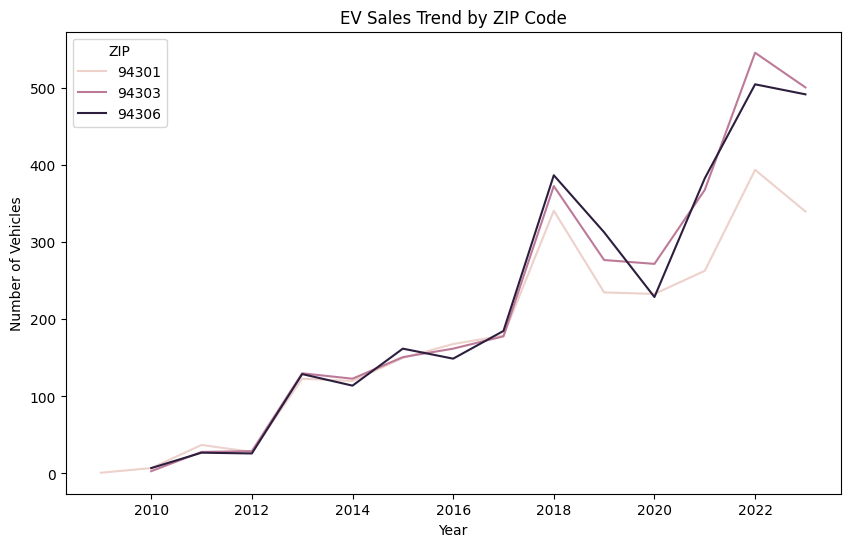


EV Population Dataset:
   Data Year Dashboard Fuel Type Group               Fuel Type    ZIP  \
0       2010    Battery Electric (BEV)  Battery Electric (BEV)  94306   
1       2010    Battery Electric (BEV)  Battery Electric (BEV)  94303   
2       2010    Battery Electric (BEV)  Battery Electric (BEV)  94301   
3       2011    Battery Electric (BEV)  Battery Electric (BEV)  94306   
4       2011    Battery Electric (BEV)  Battery Electric (BEV)  94303   

   Number of Vehicles  
0                   7  
1                   3  
2                   8  
3                  23  
4                  29  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data Year                  39 non-null     int64 
 1   Dashboard Fuel Type Group  39 non-null     object
 2   Fuel Type                  39 non-null     object
 3   ZIP        

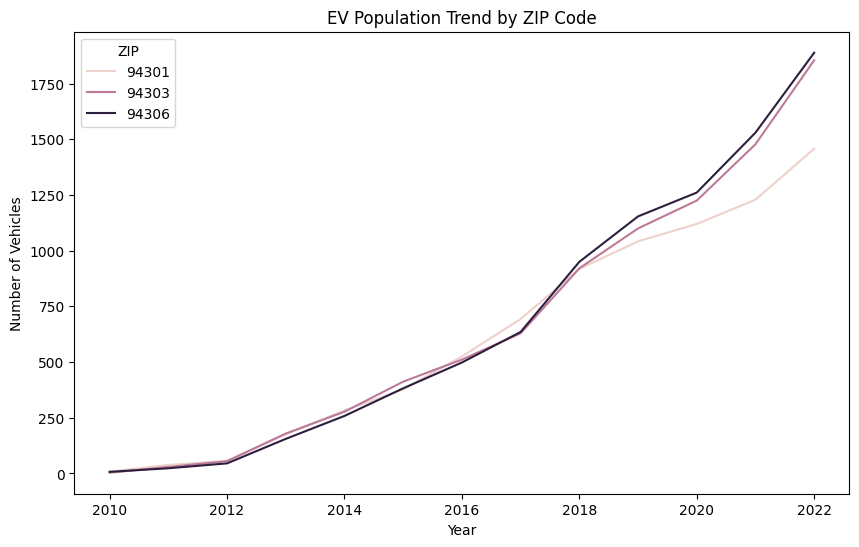


Energy Consumption Dataset:
   ZipCode          Charging Station        Address       City       State  \
0    94301  PALO ALTO CA / BRYANT #1  445 Bryant St  Palo Alto  California   
1    94301  PALO ALTO CA / BRYANT #1  445 Bryant St  Palo Alto  California   
2    94301  PALO ALTO CA / BRYANT #1  445 Bryant St  Palo Alto  California   
3    94301  PALO ALTO CA / BRYANT #1  445 Bryant St  Palo Alto  California   
4    94301  PALO ALTO CA / BRYANT #1  445 Bryant St  Palo Alto  California   

    Latitude   Longitude        Start Date          End Date Total Duration  \
0  37.446651 -122.161919  09-06-2020 11:22  09-06-2020 13:03       01:40:27   
1  37.446651 -122.161919  09-07-2020 12:51  09-07-2020 13:44       00:53:04   
2  37.446651 -122.161919    10/13/20 13:40    10/13/20 15:01       01:20:57   
3  37.446651 -122.161919     10/14/20 9:23     10/15/20 7:52       22:29:11   
4  37.446651 -122.161919    10/17/20 16:22    10/17/20 17:18       00:56:18   

  Charging Time Charging Po

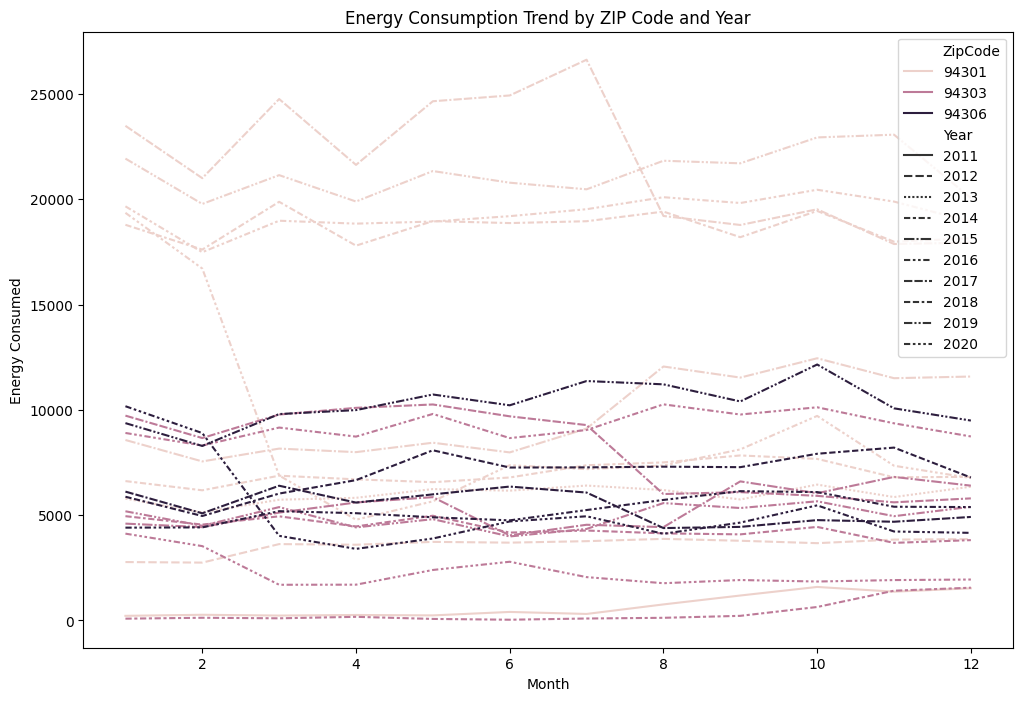

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ev_sales = pd.read_csv('EV_Sales_Zip_Count_1998-2023_paloalto.csv')
ev_population = pd.read_csv('Vehicle_Population_Zip_2010-22_paloalto.csv')
energy_consumption = pd.read_csv('chargingstations_edits.csv')

# EDA for EV Sales dataset
print("EV Sales Dataset:")
print(ev_sales.head())
print(ev_sales.info())
print(ev_sales.describe())

# Set bright color palette for EV Sales plot
sns.set_palette("bright")

plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_sales, x='Data Year', y='Number of Vehicles', hue='ZIP')
plt.title('EV Sales Trend by ZIP Code')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

# EDA for EV Population dataset
print("\nEV Population Dataset:")
print(ev_population.head())
print(ev_population.info())
print(ev_population.describe())

# Set bright color palette for EV Population plot
sns.set_palette("bright")

plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_population, x='Data Year', y='Number of Vehicles', hue='ZIP')
plt.title('EV Population Trend by ZIP Code')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

# EDA for Energy Consumption dataset
print("\nEnergy Consumption Dataset:")
print(energy_consumption.head())
print(energy_consumption.info())
print(energy_consumption.describe())

energy_consumption['Start Date'] = pd.to_datetime(energy_consumption['Start Date'], format='mixed', dayfirst=True)
energy_consumption['Year'] = energy_consumption['Start Date'].dt.year
energy_consumption['Month'] = energy_consumption['Start Date'].dt.month

energy_consumption_agg = energy_consumption.groupby(['Year', 'Month', 'ZipCode'])['Energy Consumed'].sum().reset_index()

# Set bright color palette for Energy Consumption plot
sns.set_palette("bright")

plt.figure(figsize=(12, 8))
sns.lineplot(data=energy_consumption_agg, x='Month', y='Energy Consumed', hue='ZipCode', style='Year')
plt.title('Energy Consumption Trend by ZIP Code and Year')
plt.xlabel('Month')
plt.ylabel('Energy Consumed')
plt.show()


In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data
ev_sales = pd.read_csv('EV_Sales_Zip_Count_1998-2023_paloalto.csv')
ev_population = pd.read_csv('Vehicle_Population_Zip_2010-22_paloalto.csv')
energy_consumption = pd.read_csv('chargingstations_edits.csv')

# Filter data for the relevant years and zip codes
ev_sales = ev_sales[(ev_sales['Data Year'] >= 2011) & (ev_sales['Data Year'] <= 2020) & (ev_sales['ZIP'].isin([94301, 94303, 94306]))]
ev_population = ev_population[(ev_population['Data Year'] >= 2011) & (ev_population['Data Year'] <= 2020) & (ev_population['ZIP'].isin([94301, 94303, 94306]))]

# Convert 'Start Date' to datetime using 'mixed' format and extract the year
energy_consumption['Start Date'] = pd.to_datetime(energy_consumption['Start Date'], format='mixed', dayfirst=True)
energy_consumption['Year'] = energy_consumption['Start Date'].dt.year

# Filter data for the relevant years and zip codes
energy_consumption = energy_consumption[(energy_consumption['Year'] >= 2011) & (energy_consumption['Year'] <= 2020) & (energy_consumption['ZipCode'].isin([94301, 94303, 94306]))]

# Aggregate data by year and zip code
ev_sales_agg = ev_sales.groupby(['Data Year', 'ZIP'])['Number of Vehicles'].sum().reset_index()
ev_population_agg = ev_population.groupby(['Data Year', 'ZIP'])['Number of Vehicles'].sum().reset_index()
energy_consumption_agg = energy_consumption.groupby(['Year', 'ZipCode'])['Energy Consumed'].sum().reset_index()

# Merge the datasets
merged_data = pd.merge(ev_sales_agg, ev_population_agg, on=['Data Year', 'ZIP'])
merged_data = pd.merge(merged_data, energy_consumption_agg, left_on=['Data Year', 'ZIP'], right_on=['Year', 'ZipCode'])

# Rename columns for clarity
merged_data = merged_data.rename(columns={'Number of Vehicles_x': 'EV Sales', 'Number of Vehicles_y': 'EV Population', 'Energy Consumed': 'Energy Consumption'})
print (merged_data)

# Split the data into training and testing sets
train_data = merged_data[merged_data['Data Year'] < 2019]
test_data = merged_data[merged_data['Data Year'] >= 2019]

# Create and train the ARIMA model
model = ARIMA(train_data['Energy Consumption'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model performance
mse = ((predictions - test_data['Energy Consumption']) ** 2).mean()
print(f"Mean Squared Error (MSE): {mse}")

# Forecast energy demand for 2021-2025
future_data = pd.DataFrame({'Data Year': range(2021, 2026)})
future_predictions = model_fit.forecast(steps=len(future_data))
future_data['Energy Consumption'] = future_predictions

print("Energy Demand Forecast (2021-2025):")
print(future_data)


    Data Year    ZIP  EV Sales  EV Population  Year  ZipCode  \
0        2011  94301        37             38  2011    94301   
1        2012  94301        28             56  2012    94301   
2        2013  94301       123            175  2013    94301   
3        2014  94301       120            283  2014    94301   
4        2014  94303       123            277  2014    94303   
5        2015  94301       150            377  2015    94301   
6        2015  94303       151            412  2015    94303   
7        2016  94301       168            525  2016    94301   
8        2016  94303       162            511  2016    94303   
9        2016  94306       149            498  2016    94306   
10       2017  94301       179            693  2017    94301   
11       2017  94303       178            629  2017    94303   
12       2017  94306       185            635  2017    94306   
13       2018  94301       341            918  2018    94301   
14       2018  94303       373          

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data
ev_sales = pd.read_csv('EV_Sales_Zip_Count_1998-2023_paloalto.csv')
ev_population = pd.read_csv('Vehicle_Population_Zip_2010-22_paloalto.csv')
energy_consumption = pd.read_csv('chargingstations_edits.csv')

# Filter data for the relevant years and zip codes
ev_sales = ev_sales[(ev_sales['Data Year'] >= 2011) & (ev_sales['Data Year'] <= 2020) & (ev_sales['ZIP'].isin([94301, 94303, 94306]))]
ev_population = ev_population[(ev_population['Data Year'] >= 2011) & (ev_population['Data Year'] <= 2020) & (ev_population['ZIP'].isin([94301, 94303, 94306]))]

# Convert 'Start Date' to datetime using 'mixed' format and extract the year
energy_consumption['Start Date'] = pd.to_datetime(energy_consumption['Start Date'], format='mixed', dayfirst=True)
energy_consumption['Year'] = energy_consumption['Start Date'].dt.year

# Filter data for the relevant years and zip codes
energy_consumption = energy_consumption[(energy_consumption['Year'] >= 2011) & (energy_consumption['Year'] <= 2020) & (energy_consumption['ZipCode'].isin([94301, 94303, 94306]))]

# Aggregate data by year and zip code
ev_sales_agg = ev_sales.groupby(['Data Year', 'ZIP'])['Number of Vehicles'].sum().reset_index()
ev_population_agg = ev_population.groupby(['Data Year', 'ZIP'])['Number of Vehicles'].sum().reset_index()
energy_consumption_agg = energy_consumption.groupby(['Year', 'ZipCode'])['Energy Consumed'].sum().reset_index()

# Merge the datasets
merged_data = pd.merge(ev_sales_agg, ev_population_agg, on=['Data Year', 'ZIP'])
merged_data = pd.merge(merged_data, energy_consumption_agg, left_on=['Data Year', 'ZIP'], right_on=['Year', 'ZipCode'])

# Rename columns for clarity
merged_data = merged_data.rename(columns={'Number of Vehicles_x': 'EV Sales', 'Number of Vehicles_y': 'EV Population', 'Energy Consumed': 'Energy Consumption'})

# Check for missing values in 'Energy Consumption' column
print("Missing values in 'Energy Consumption' column:")
print(merged_data['Energy Consumption'].isnull().sum())

# Fill missing values with 0
merged_data['Energy Consumption'].fillna(0, inplace=True)

# Check the stationarity of the 'Energy Consumption' data
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_data['Energy Consumption'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Apply differencing if the data is not stationary
if result[1] > 0.05:
    merged_data['Energy Consumption'] = merged_data['Energy Consumption'].diff().dropna()

# Split the data into training and testing sets
train_data = merged_data[merged_data['Data Year'] < 2019]
test_data = merged_data[merged_data['Data Year'] >= 2019]

# Experiment with different orders for the ARIMA model
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None

for param in pdq:
    try:
        model = ARIMA(train_data['Energy Consumption'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except:
        continue

print('Best ARIMA order:', best_order)

# Create and train the ARIMA model with the best order
model = ARIMA(train_data['Energy Consumption'], order=best_order)
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model performance
mse = ((predictions - test_data['Energy Consumption']) ** 2).mean()
print(f"Mean Squared Error (MSE): {mse}")

# Forecast energy demand for 2021-2025
future_data = pd.DataFrame({'Data Year': range(2021, 2026)})
future_predictions = model_fit.forecast(steps=len(future_data))
future_data['Energy Consumption'] = future_predictions

print("Energy Demand Forecast (2021-2025):")
print(future_data)


Missing values in 'Energy Consumption' column:
0
ADF Statistic: -1.743870
p-value: 0.408663


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Best ARIMA order: (0, 0, 1)
Mean Squared Error (MSE): 11024573486.357622
Energy Demand Forecast (2021-2025):
   Data Year  Energy Consumption
0       2021                 NaN
1       2022                 NaN
2       2023                 NaN
3       2024                 NaN
4       2025                 NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

